In [2]:
import cv2

from podm.bounding_box import BoundingBox
import podm.utils.general_utils as general_utils
from podm.utils.enumerators import BBFormat, BBType, CoordinatesType

import sys
sys.path.append("/home/atom/bounding-box/")
from bounding_box import bounding_box as bb

sys.path.append("/home/atom/SoccerTrack/")
from soccertrack.utils import cv2pil


In [3]:
def read_annotation(file_path, all_classes=[], img_file='', img_size=None, bb_type=BBType.GROUND_TRUTH, yolov5=False):
    with open(file_path, "r") as f:
        for line in f:
            if line.replace(" ", "") == "\n":
                continue
            splitted_line = line.split(" ")
            class_id = splitted_line[0]
            if not general_utils.is_str_int(class_id):
                print(
                    f"Warning: Class id ({class_id}) represented in the {file_path} is not a valid integer."
                )
                

            class_id = int(class_id)
            if class_id not in range(len(all_classes)):
                print(
                    f"Warning: Class id ({class_id}) represented in the {file_path} is not in the range of classes specified."
                )

            if bb_type == BBType.GROUND_TRUTH:
                confidence = None
                x1 = float(splitted_line[1])
                y1 = float(splitted_line[2])
                w = float(splitted_line[3])
                h = float(splitted_line[4])
            elif bb_type == BBType.DETECTED:
                if yolov5:
                    x1 = float(splitted_line[1])
                    y1 = float(splitted_line[2])
                    w = float(splitted_line[3])
                    h = float(splitted_line[4])
                    confidence = float(splitted_line[5])
                else:
                    confidence = float(splitted_line[1])
                    x1 = float(splitted_line[2])
                    y1 = float(splitted_line[3])
                    w = float(splitted_line[4])
                    h = float(splitted_line[5])

            bb = BoundingBox(
                image_name=general_utils.get_file_name_only(img_file),
                class_id=all_classes[class_id],
                coordinates=(x1, y1, w, h),
                img_size=img_size,
                confidence=confidence,
                type_coordinates=CoordinatesType.RELATIVE,
                bb_type=bb_type,
                format=BBFormat.YOLO,
            )
            return bb


In [26]:
def visualize_frame(frame):
    in_path=f"/mnt/share/atom/SoccerTrackDataset/drone_ball"
    if frame <= 0:
        print(f"frames start at {308}")
        return 
    elif frame <= 15414:
        image_path = f"{in_path}/train/images/{frame:06d}.png"
        label_path = f"{in_path}/train/labels/frame_{frame:06d}.txt"
    else:
        image_path = f"{in_path}/val/images/{frame:06d}.png"
        label_path = f"{in_path}/val/labels/frame_{frame:06d}.txt"
    print(f"Reading image {image_path}")
    print(f"Reading label {label_path}")
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    bbox = read_annotation(
        label_path, 
        all_classes=['sports ball'], 
        img_file=image_path, 
        img_size=image.shape[:2][::-1], 
        bb_type=BBType.GROUND_TRUTH, 
        yolov5=False
    )
    left, top, right, bottom = bbox.get_absolute_bounding_box(format=BBFormat.XYX2Y2)
    label = ''
    color = 'blue'
    bb.add(image, left, top, right, bottom, label, color)
    return image

Reading image /mnt/share/atom/SoccerTrackDataset/drone_ball/train/images/015006.png
Reading label /mnt/share/atom/SoccerTrackDataset/drone_ball/train/labels/frame_015006.txt


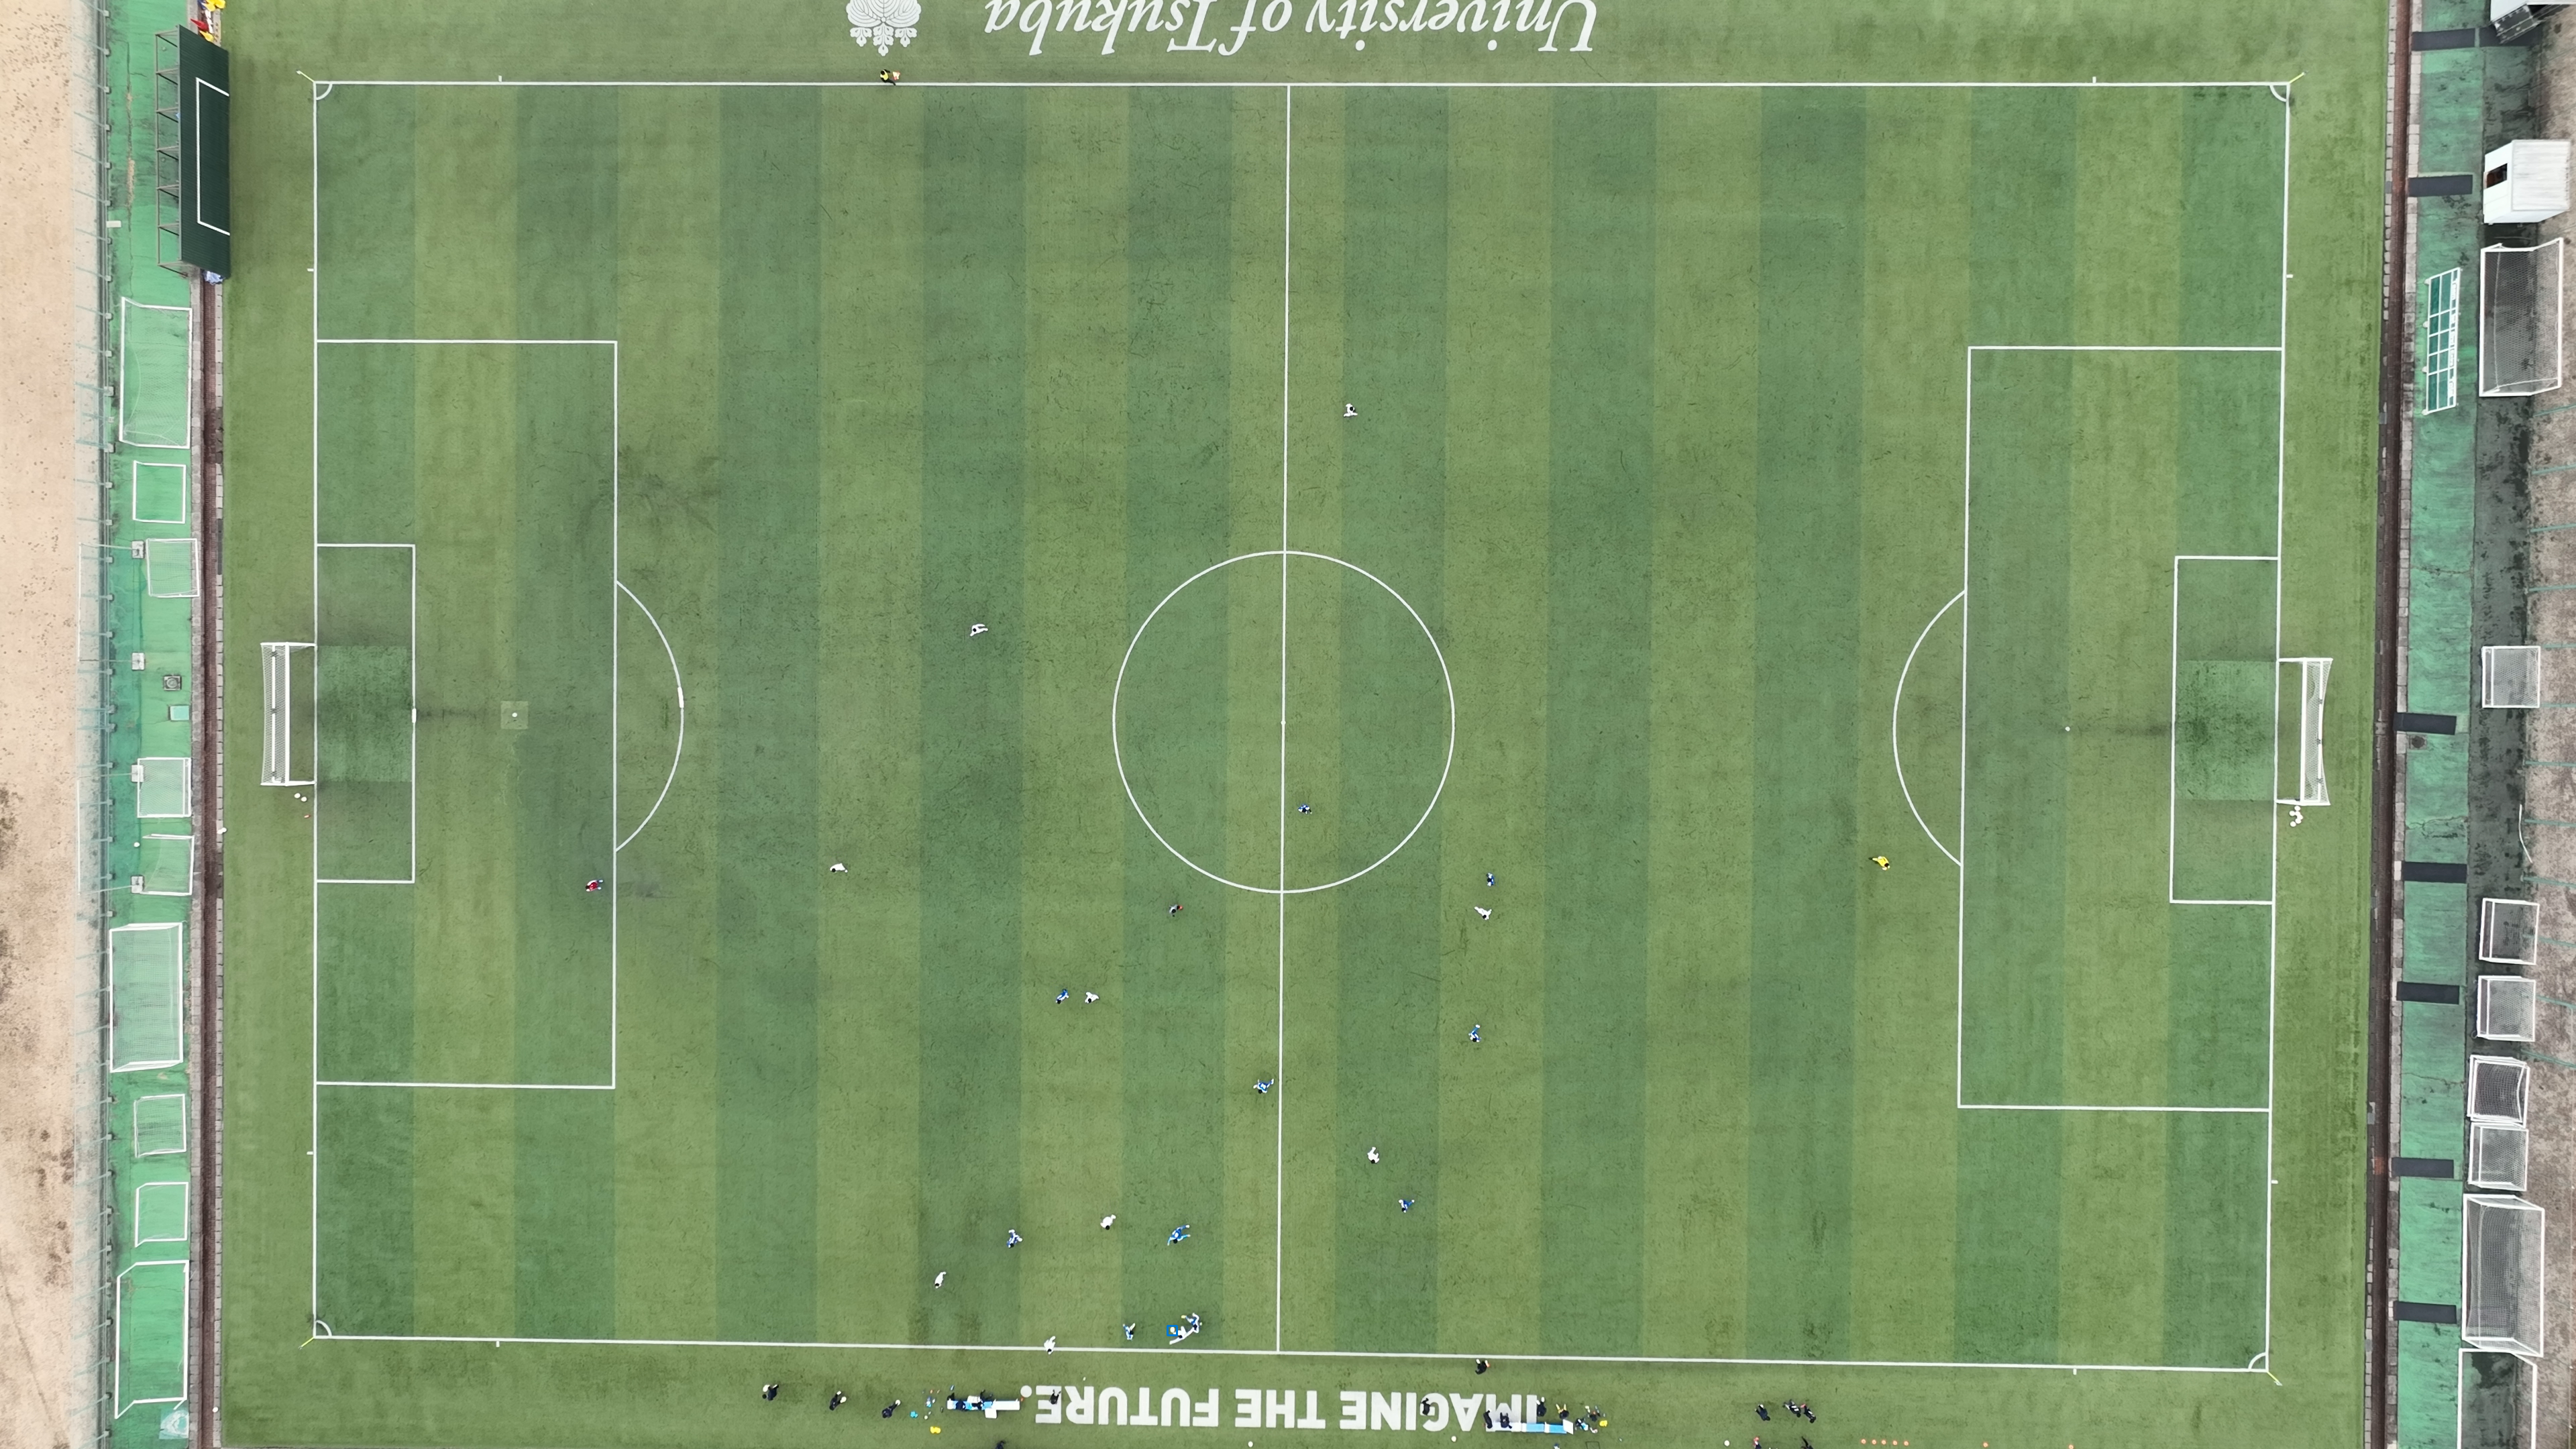

In [29]:
i=15006
image = visualize_frame(i)
cv2pil(image)

In [30]:
image.shape

(2160, 3840, 3)

In [8]:
import os
import re

label_dir = "/mnt/share/atom/SoccerTrackDataset/drone_ball/train/labels/"

offset = -2997
for label_file in sorted(os.listdir(label_dir)):
    old_name = os.path.join(label_dir, label_file)
    old_number = os.path.splitext(label_file.split('_')[-1])[0]

    new_number = f"{int(old_number) + offset:06d}"
    new_name = os.path.join(label_dir, f"frame_{new_number}.txt")

    os.rename(old_name, new_name)
    # print(f"Renamed {old_name} to {new_name}")

In [24]:
offset=17147
img_dir = "/mnt/share/atom/SoccerTrackDataset/drone_ball/val/images/"
for img_file in sorted(os.listdir(img_dir)):
    old_name = os.path.join(img_dir, img_file)
    old_number = os.path.splitext(img_file.split('_')[-1])[0]

    new_number = f"{int(old_number) + offset:06d}"
    new_name = os.path.join(img_dir, f"{new_number}.png")

    os.rename(old_name, new_name)
    # print(f"Renamed {old_name} to {new_name}")

In [4]:
import os 

label_dir = "/mnt/share/atom/SoccerTrackDataset/drone_ball/val/labels/"
for label_file in sorted(os.listdir(label_dir)):
    old_name = os.path.join(label_dir, label_file)

    # remove "frame_" from old_name
    new_name = old_name.replace('frame_', '')
    # print(old_name, new_name)
    os.rename(old_name, new_name)